In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

In [13]:
df = pd.read_csv("C:\\Users\\rohit\\Downloads\\Fraud_detection.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
# Data Preprocessing and Cleaning
df.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [17]:
df['type'] = df['type'].astype('category')
df = pd.get_dummies(df, columns=['type'], prefix='type')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])


In [19]:
#  Checking for and Handling Outliers or Impossible Values
print((df['amount'] < 0).sum())
print((df['oldbalanceOrg'] < 0).sum())
print((df['newbalanceOrig'] < 0).sum())
print((df['oldbalanceDest'] < 0).sum())
print((df['newbalanceDest'] < 0).sum())
df = df[df['amount'] >= 0]
df = df[(df['oldbalanceOrg'] >= 0) & (df['newbalanceOrig'] >= 0)]
df = df[(df['oldbalanceDest'] >= 0) & (df['newbalanceDest'] >= 0)]


0
0
0
0
0


In [20]:
# Checking for Consistency of Balances After Transactions
df['errorOrig'] = np.abs(df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig'])
df['errorDest'] = np.abs(df['oldbalanceDest'] + df['amount'] - df['newbalanceDest'])

print(df[(df['errorOrig'] > 1) | (df['errorDest'] > 1)].head())

df = df[(df['errorOrig'] <= 1) & (df['errorDest'] <= 1)]
df = df.drop(['errorOrig', 'errorDest'], axis=1)


   step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1   9839.64    757869       170136.0       160296.36   1662094   
1     1   1864.28   2188998        21249.0        19384.72   1733924   
2     1    181.00   1002156          181.0            0.00    439685   
3     1    181.00   5828262          181.0            0.00    391696   
4     1  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0         False   
1             0.0             0.0        0               0         False   
2             0.0             0.0        1               0         False   
3         21182.0             0.0        1               0         False   
4             0.0             0.0        0               0         False   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  errorOrig  \
0          False       False          

In [21]:
# Removing duplicate rows if any
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows.")


Removed 0 duplicate rows.


In [22]:
import pandas as pd
print(df.info())
print(df.describe(include='all'))  

# Value counts for key features
print(df['isFraud'].value_counts(normalize=True))           # Class imbalance
print(df['isFlaggedFraud'].value_counts(normalize=True))    # Flags vs. actual fraud



<class 'pandas.core.frame.DataFrame'>
Index: 279916 entries, 1124 to 6362619
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            279916 non-null  int64  
 1   amount          279916 non-null  float64
 2   nameOrig        279916 non-null  int32  
 3   oldbalanceOrg   279916 non-null  float64
 4   newbalanceOrig  279916 non-null  float64
 5   nameDest        279916 non-null  int32  
 6   oldbalanceDest  279916 non-null  float64
 7   newbalanceDest  279916 non-null  float64
 8   isFraud         279916 non-null  int64  
 9   isFlaggedFraud  279916 non-null  int64  
 10  type_CASH_IN    279916 non-null  bool   
 11  type_CASH_OUT   279916 non-null  bool   
 12  type_DEBIT      279916 non-null  bool   
 13  type_PAYMENT    279916 non-null  bool   
 14  type_TRANSFER   279916 non-null  bool   
dtypes: bool(5), float64(5), int32(2), int64(3)
memory usage: 22.7 MB
None
                 step        amou

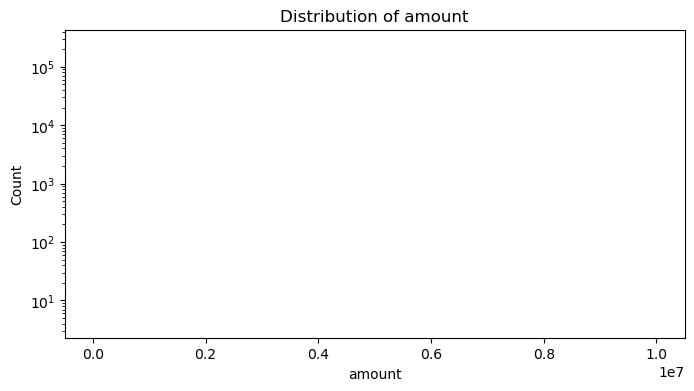

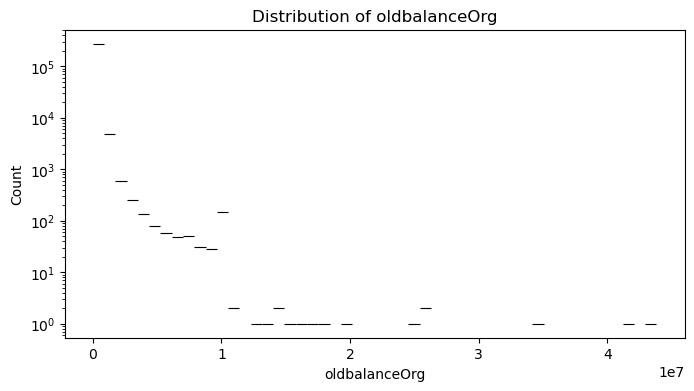

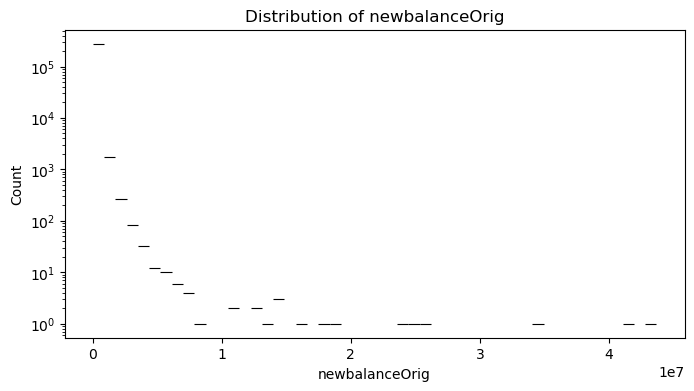

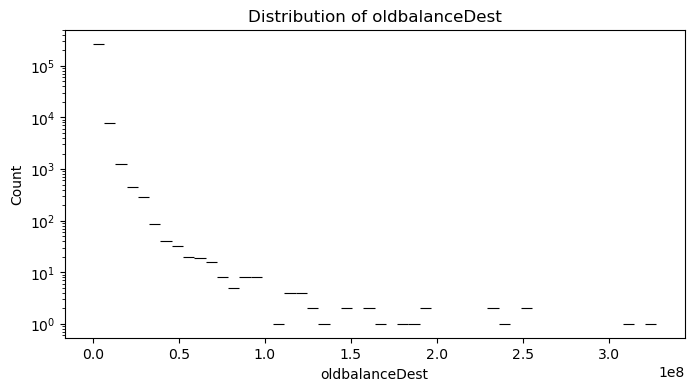

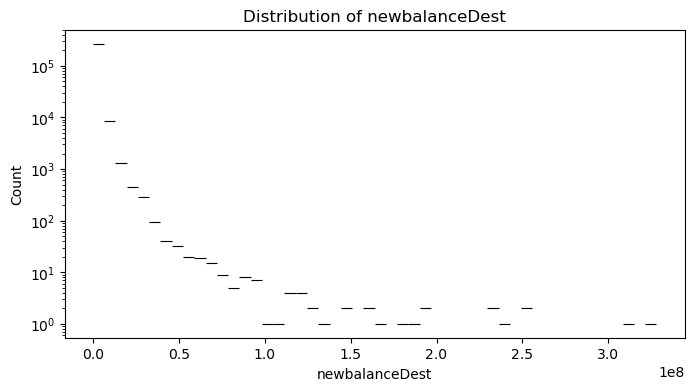

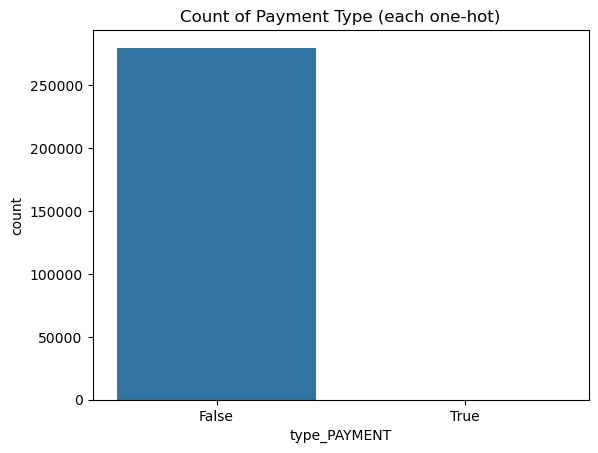

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, log_scale=(False, True))  # Log y-scale for outlier tails
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


sns.countplot(data=df, x='type_PAYMENT')  
plt.title('Count of Payment Type (each one-hot)')
plt.show()


Fraud rate by type_PAYMENT: type_PAYMENT
False    0.014127
True     0.000000
Name: isFraud, dtype: float64
Fraud rate by type_CASH_OUT: type_CASH_OUT
False    0.000000
True     0.016941
Name: isFraud, dtype: float64
Fraud rate by type_TRANSFER: type_TRANSFER
False    0.015164
True     0.000000
Name: isFraud, dtype: float64
Fraud rate by type_DEBIT: type_DEBIT
False    0.015645
True     0.000000
Name: isFraud, dtype: float64
Fraud rate by type_CASH_IN: type_CASH_IN
False    0.014122
True     0.000000
Name: isFraud, dtype: float64


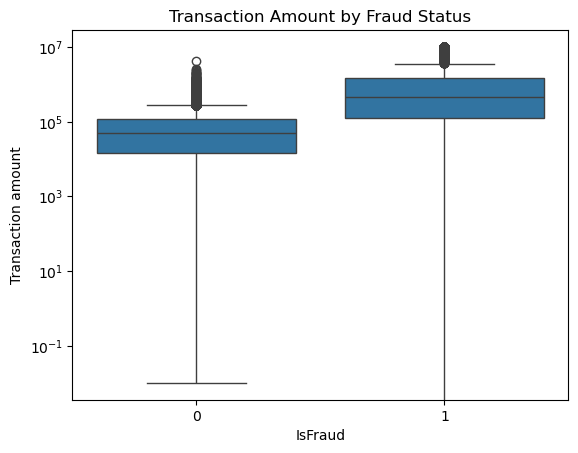

In [25]:
for col in ['type_PAYMENT', 'type_CASH_OUT', 'type_TRANSFER', 'type_DEBIT', 'type_CASH_IN']:
    if col in df.columns:
        rate = df.groupby(col)['isFraud'].mean()
        print(f"Fraud rate by {col}:", rate)

sns.boxplot(x='isFraud', y='amount', data=df)
plt.ylabel('Transaction amount')
plt.xlabel('IsFraud')
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')  # Log scale to handle wide range of amounts


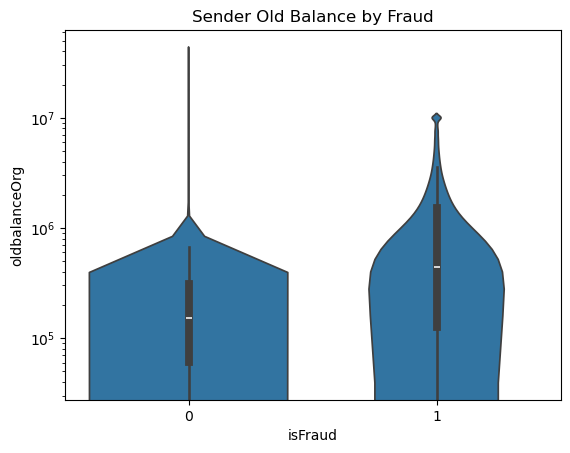

In [26]:
sns.violinplot(x='isFraud', y='oldbalanceOrg', data=df)
plt.yscale('log')
plt.title('Sender Old Balance by Fraud')
plt.show()


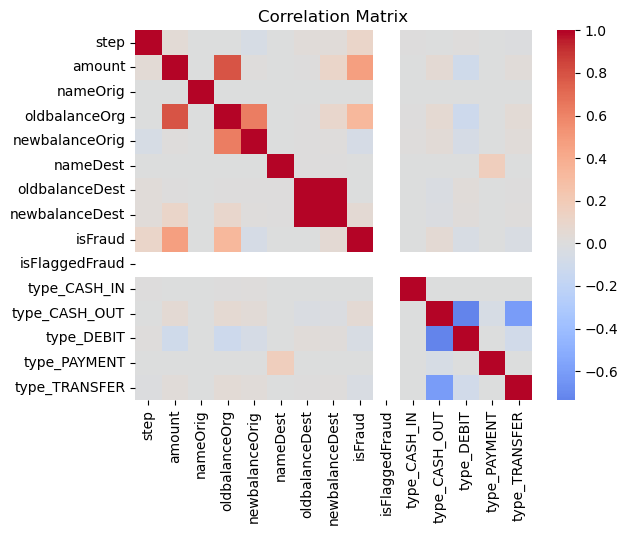

isFraud           1.000000
amount            0.476914
oldbalanceOrg     0.331904
step              0.101060
type_CASH_OUT     0.053477
newbalanceDest    0.044527
type_CASH_IN     -0.000392
nameDest         -0.000837
nameOrig         -0.001368
type_PAYMENT     -0.002340
oldbalanceDest   -0.003228
type_TRANSFER    -0.032506
type_DEBIT       -0.039299
newbalanceOrig   -0.061865
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [27]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


print(corr['isFraud'].sort_values(ascending=False))


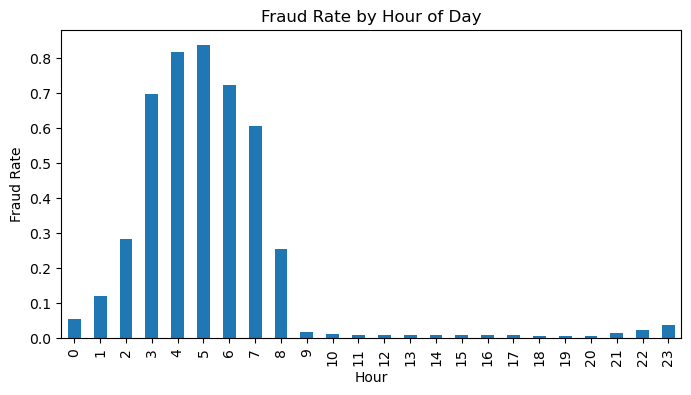

In [28]:

df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24

# Fraud by hour
fraud_by_hour = df.groupby('hour')['isFraud'].mean()
plt.figure(figsize=(8,4))
fraud_by_hour.plot(kind='bar')
plt.title('Fraud Rate by Hour of Day')
plt.ylabel('Fraud Rate')
plt.xlabel('Hour')
plt.show()


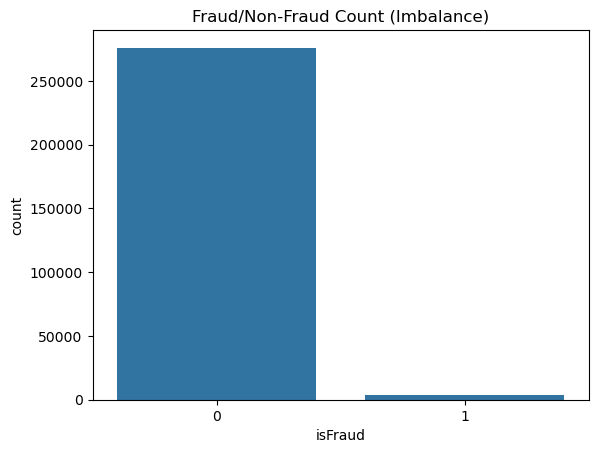

In [29]:
sns.countplot(x='isFraud', data=df)
plt.title('Fraud/Non-Fraud Count (Imbalance)')
plt.show()


In [30]:
# Fraud rate by transaction type
fraud_by_type = df.groupby('type_PAYMENT')['isFraud'].mean()  
print(fraud_by_type)


print(df.groupby('isFlaggedFraud')['isFraud'].mean())


type_PAYMENT
False    0.014127
True     0.000000
Name: isFraud, dtype: float64
isFlaggedFraud
0    0.014122
Name: isFraud, dtype: float64


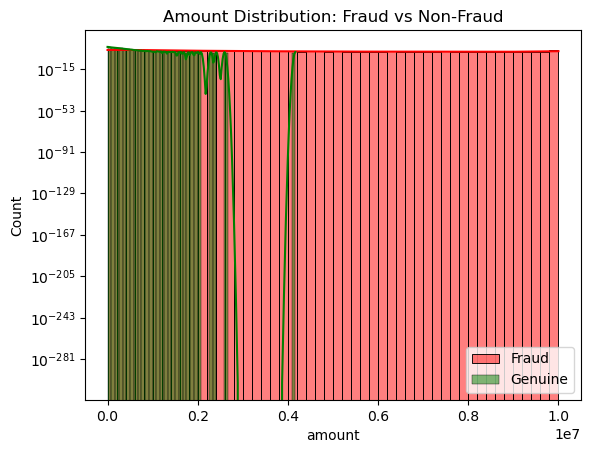

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df['isFraud']==1]['amount'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(df[df['isFraud']==0]['amount'], bins=50, color='green', label='Genuine', kde=True)
plt.yscale('log')
plt.title('Amount Distribution: Fraud vs Non-Fraud')
plt.legend()
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_26780\1390931726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby('amount_bin')['isFraud'].mean()


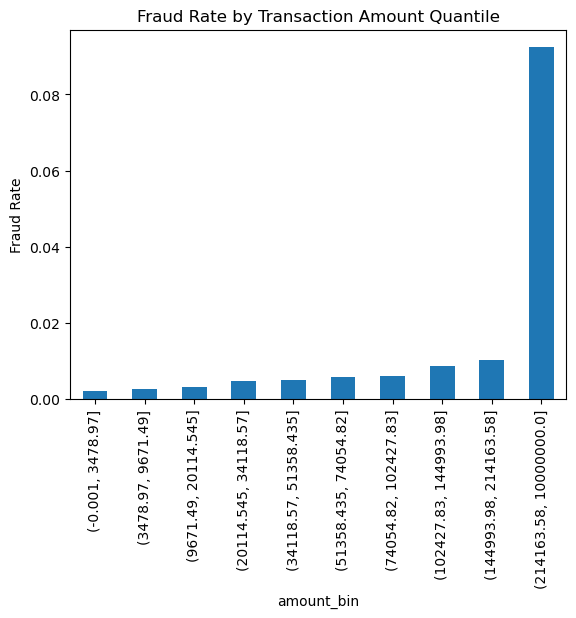

In [32]:
df['amount_bin'] = pd.qcut(df['amount'], 10, duplicates='drop')
fraud_by_amount = df.groupby('amount_bin')['isFraud'].mean()
fraud_by_amount.plot(kind='bar', title='Fraud Rate by Transaction Amount Quantile')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.show()


In [44]:
%pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare features and target
features = ['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 
            'nameDest', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
            'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X = df[features]
y = df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = xgb.XGBClassifier(
    n_estimators=200, 
    max_depth=8, 
    scale_pos_weight=(df['isFraud']==0).sum()/(df['isFraud']==1).sum(),  # for class imbalance
    n_jobs=-1)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)
xgb_proba = model.predict_proba(X_test)[:, 1]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import xgboost as xgb
import numpy as np


# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight='balanced',  # balances classes for rare fraud cases
    n_jobs=-1,
    random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]





In [50]:
def evaluate_model(y_true, y_pred, y_proba, name):
    print(f"==== {name} ====")
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    print("PR-AUC:", auc(recall, precision))
    print("Classification report:\n", classification_report(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, rf_proba, "Random Forest")
print()
# Evaluate XGBoost
evaluate_model(y_test, xgb_pred, xgb_proba, "XGBoost")


==== Random Forest ====
ROC-AUC: 1.0
PR-AUC: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55155
           1       1.00      1.00      1.00       829

    accuracy                           1.00     55984
   macro avg       1.00      1.00      1.00     55984
weighted avg       1.00      1.00      1.00     55984

Confusion matrix:
 [[55155     0]
 [    0   829]]

==== XGBoost ====
ROC-AUC: 0.9997744157571506
PR-AUC: 0.9886498411470398
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55155
           1       0.92      0.97      0.95       829

    accuracy                           1.00     55984
   macro avg       0.96      0.99      0.97     55984
weighted avg       1.00      1.00      1.00     55984

Confusion matrix:
 [[55087    68]
 [   22   807]]


In [51]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, model.predict(X_train))


f1_val = f1_score(y_test, model.predict(X_test))

print("F1 Score - Training:", f1_train)
print("F1 Score - Validation:", f1_val)


F1 Score - Training: 1.0
F1 Score - Validation: 0.9471830985915493
